In [2]:
import os
import cv2
import numpy as np
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt

# 데이터 경로 설정
data_root = '/data0/aix23907/gait'
rgb_path = os.path.join(data_root, 'CCPG_G_SIL')

print(f"RGB 데이터 경로: {rgb_path}")
print(f"경로 존재 여부: {os.path.exists(rgb_path)}\n")

# 디렉토리 구조 확인
if os.path.exists(rgb_path):
    ids = sorted(os.listdir(rgb_path))[:5]  # 처음 5개 ID만 확인
    print(f"총 ID 개수: {len(os.listdir(rgb_path))}")
    print(f"샘플 ID: {ids}\n")
    
    # 첫 번째 ID의 구조 확인
    if ids:
        first_id = ids[0]
        first_id_path = os.path.join(rgb_path, first_id)
        print(f"첫 번째 ID ({first_id}) 구조:")
        for item in sorted(os.listdir(first_id_path))[:3]:
            item_path = os.path.join(first_id_path, item)
            if os.path.isdir(item_path):
                print(f"  - {item}/ (디렉토리)")
                # 한 단계 더 들어가서 확인
                sub_items = sorted(os.listdir(item_path))[:2]
                for sub_item in sub_items:
                    sub_item_path = os.path.join(item_path, sub_item)
                    if os.path.isdir(sub_item_path):
                        files = [f for f in os.listdir(sub_item_path) 
                                if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                        print(f"    - {sub_item}/: {len(files)}개 이미지 파일")
                        if files:
                            print(f"      예시 파일: {files[0]}")


RGB 데이터 경로: /data0/aix23907/gait/CCPG_G_SIL
경로 존재 여부: True

총 ID 개수: 200
샘플 ID: ['000', '001', '002', '003', '004']

첫 번째 ID (000) 구조:
  - U0_D0/ (디렉토리)
    - 01_0/: 233개 이미지 파일
      예시 파일: 00000121.png
    - 02_0/: 43개 이미지 파일
      예시 파일: 00000374.png
  - U0_D0_BG/ (디렉토리)
    - 01_0/: 267개 이미지 파일
      예시 파일: 00000121.png
    - 02_0/: 35개 이미지 파일
      예시 파일: 00000412.png
  - U0_D3/ (디렉토리)
    - 01_0/: 218개 이미지 파일
      예시 파일: 00000121.png
    - 02_0/: 30개 이미지 파일
      예시 파일: 00000374.png


In [3]:
# 이미지 해상도 샘플링 및 통계 수집
def collect_image_sizes(root_path, max_samples=100):
    """이미지 해상도를 샘플링하여 수집"""
    sizes = []
    sample_paths = []
    
    for id_dir in sorted(os.listdir(root_path)):
        id_path = os.path.join(root_path, id_dir)
        if not os.path.isdir(id_path):
            continue
            
        for type_dir in sorted(os.listdir(id_path)):
            type_path = os.path.join(id_path, type_dir)
            if not os.path.isdir(type_path):
                continue
                
            for view_dir in sorted(os.listdir(type_path)):
                view_path = os.path.join(type_path, view_dir)
                if not os.path.isdir(view_path):
                    continue
                
                # 이미지 파일 찾기
                img_files = [f for f in os.listdir(view_path) 
                           if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                
                if img_files:
                    # 각 시퀀스에서 첫 번째 이미지만 샘플링
                    img_path = os.path.join(view_path, img_files[0])
                    img = cv2.imread(img_path)
                    
                    if img is not None:
                        h, w = img.shape[:2]
                        sizes.append((h, w))
                        sample_paths.append(img_path)
                        
                        if len(sizes) >= max_samples:
                            return sizes, sample_paths
    
    return sizes, sample_paths

# 이미지 해상도 수집
print("이미지 해상도 샘플링 중...")
sizes, sample_paths = collect_image_sizes(rgb_path, max_samples=200)

if sizes:
    print(f"\n총 {len(sizes)}개 이미지 샘플링 완료\n")
    
    # 해상도 통계
    heights = [s[0] for s in sizes]
    widths = [s[1] for s in sizes]
    
    print("=" * 60)
    print("이미지 해상도 통계")
    print("=" * 60)
    print(f"높이 (Height):")
    print(f"  - 최소: {min(heights)}")
    print(f"  - 최대: {max(heights)}")
    print(f"  - 평균: {np.mean(heights):.2f}")
    print(f"  - 중앙값: {np.median(heights):.2f}")
    print(f"\n너비 (Width):")
    print(f"  - 최소: {min(widths)}")
    print(f"  - 최대: {max(widths)}")
    print(f"  - 평균: {np.mean(widths):.2f}")
    print(f"  - 중앙값: {np.median(widths):.2f}")
    
    # 해상도 분포
    size_counter = Counter(sizes)
    print(f"\n가장 많이 나타나는 해상도 (Top 10):")
    for size, count in size_counter.most_common(10):
        print(f"  {size[0]}x{size[1]}: {count}개 ({count/len(sizes)*100:.1f}%)")
    
    # 비율 통계
    ratios = [w/h for h, w in sizes]
    print(f"\n가로/세로 비율:")
    print(f"  - 최소: {min(ratios):.3f}")
    print(f"  - 최대: {max(ratios):.3f}")
    print(f"  - 평균: {np.mean(ratios):.3f}")
    print(f"  - 중앙값: {np.median(ratios):.3f}")
else:
    print("이미지를 찾을 수 없습니다!")


이미지 해상도 샘플링 중...

총 200개 이미지 샘플링 완료

이미지 해상도 통계
높이 (Height):
  - 최소: 260
  - 최대: 1227
  - 평균: 645.16
  - 중앙값: 591.50

너비 (Width):
  - 최소: 117
  - 최대: 758
  - 평균: 305.52
  - 중앙값: 298.50

가장 많이 나타나는 해상도 (Top 10):
  388x130: 1개 (0.5%)
  782x291: 1개 (0.5%)
  729x317: 1개 (0.5%)
  792x394: 1개 (0.5%)
  1055x758: 1개 (0.5%)
  557x213: 1개 (0.5%)
  620x367: 1개 (0.5%)
  489x229: 1개 (0.5%)
  643x283: 1개 (0.5%)
  597x374: 1개 (0.5%)

가로/세로 비율:
  - 최소: 0.305
  - 최대: 0.735
  - 평균: 0.477
  - 중앙값: 0.463


샘플 이미지 확인:

샘플 1: 00000121.png
  경로: /data0/aix23907/gait/CCPG_G_SIL/000/U0_D0/01_0/00000121.png
  해상도: 388 x 130 x 3
  비율: 0.335


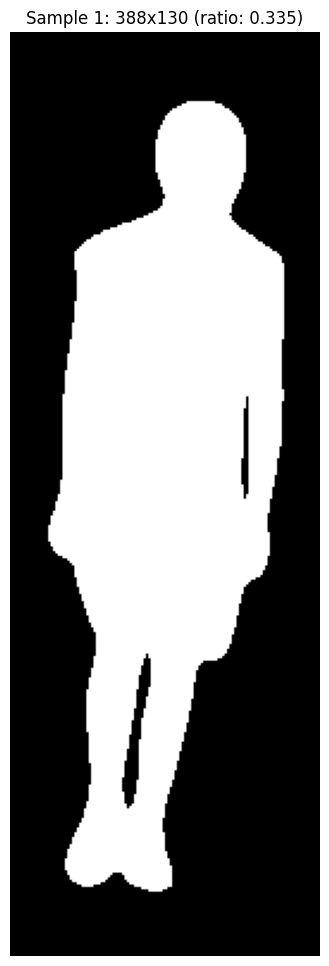


샘플 2: 00000374.png
  경로: /data0/aix23907/gait/CCPG_G_SIL/000/U0_D0/02_0/00000374.png
  해상도: 782 x 291 x 3
  비율: 0.372


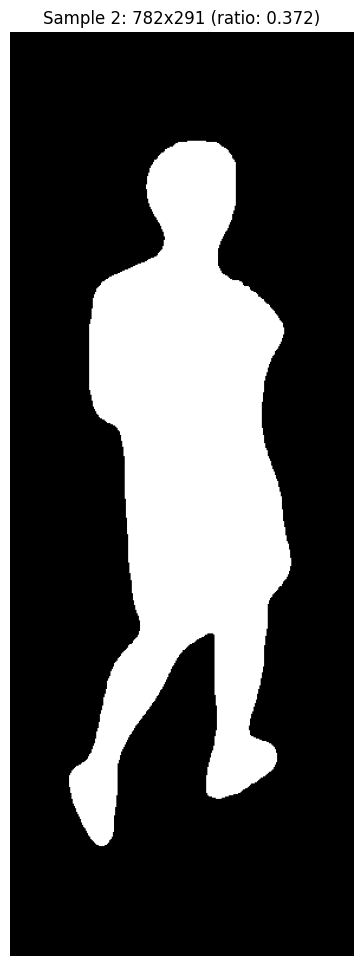


샘플 3: 00000412.png
  경로: /data0/aix23907/gait/CCPG_G_SIL/000/U0_D0/03_0/00000412.png
  해상도: 729 x 317 x 3
  비율: 0.435


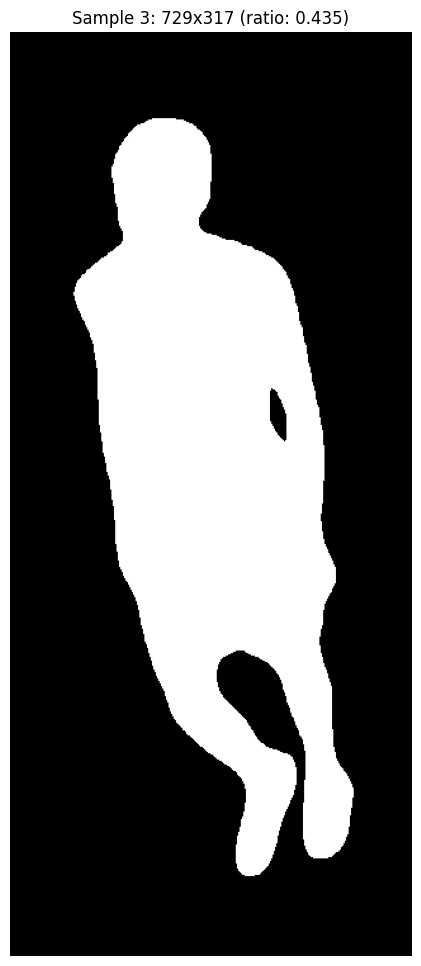

In [4]:
# 샘플 이미지 시각화
if sample_paths:
    print("샘플 이미지 확인:")
    print("=" * 60)
    
    # 처음 3개 이미지 확인
    for i, img_path in enumerate(sample_paths[:3]):
        img = cv2.imread(img_path)
        if img is not None:
            h, w, c = img.shape
            print(f"\n샘플 {i+1}: {os.path.basename(img_path)}")
            print(f"  경로: {img_path}")
            print(f"  해상도: {h} x {w} x {c}")
            print(f"  비율: {w/h:.3f}")
            
            # 이미지 표시
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(8, 12))
            plt.imshow(img_rgb)
            plt.title(f'Sample {i+1}: {h}x{w} (ratio: {w/h:.3f})')
            plt.axis('off')
            plt.show()


In [ ]:
# 전체 데이터셋의 해상도 분포 히스토그램
if sizes:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # 높이 분포
    axes[0].hist(heights, bins=30, edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Height (pixels)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Height Distribution')
    axes[0].grid(True, alpha=0.3)
    
    # 너비 분포
    axes[1].hist(widths, bins=30, edgecolor='black', alpha=0.7, color='orange')
    axes[1].set_xlabel('Width (pixels)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Width Distribution')
    axes[1].grid(True, alpha=0.3)
    
    # 비율 분포
    axes[2].hist(ratios, bins=30, edgecolor='black', alpha=0.7, color='green')
    axes[2].set_xlabel('Width/Height Ratio')
    axes[2].set_ylabel('Frequency')
    axes[2].set_title('Aspect Ratio Distribution')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 해상도 스캐터 플롯
    plt.figure(figsize=(10, 6))
    plt.scatter(widths, heights, alpha=0.5, s=20)
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.title('Image Resolution Distribution')
    plt.grid(True, alpha=0.3)
    
    # DenoisingGait 목표 해상도 표시
    plt.axhline(y=768, color='r', linestyle='--', label='Target Height (768)')
    plt.axvline(x=384, color='r', linestyle='--', label='Target Width (384)')
    plt.legend()
    plt.show()
